In [1]:
# Phase 1: Data Cleaning & Preprocessing
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('weather.csv')
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month
df['Day'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour
df['Weekday'] = df['Date/Time'].dt.dayofweek  # Monday=0, Sunday=6
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('%', 'pct')
df.isnull().sum()
df['Weather'] = df['Weather'].str.lower()

df['Weather_Condition'] = df['Weather'].replace({
    'clear': 'clear',
    'mainly clear': 'clear',
    'partly cloudy': 'cloudy',
    'cloudy': 'cloudy',
    'fog': 'fog',
    'freezing drizzle,fog': 'foggy drizzle',
    'rain': 'rain',
    'moderate snow': 'snow',
    'heavy snow': 'snow',
    # Add more rules based on value_counts()
})
df['Weather'].value_counts()
df.to_csv('cleaned_weather.csv', index=False)


In [3]:
#  Phase 2: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")


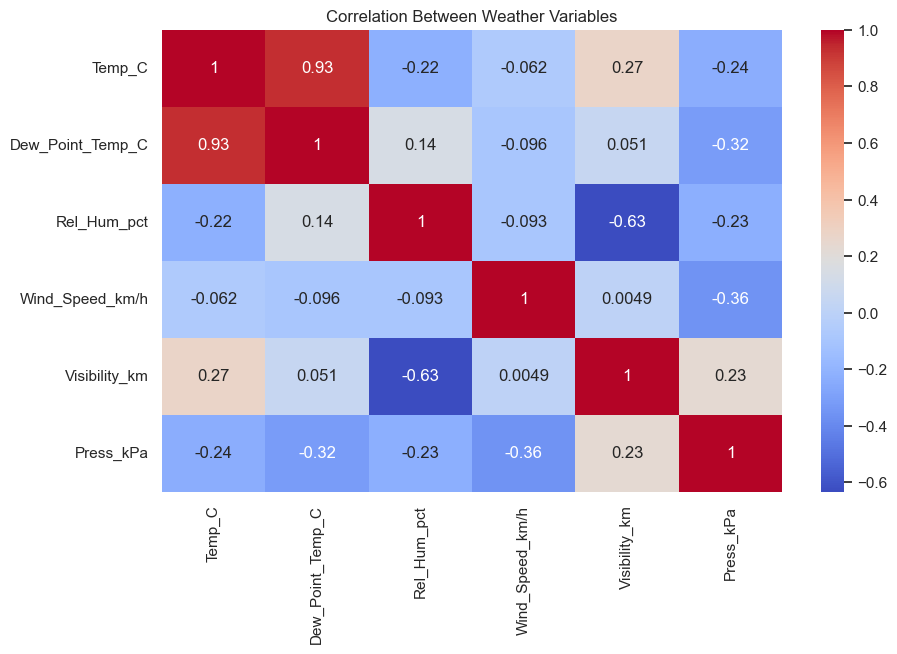

In [4]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[['Temp_C', 'Dew_Point_Temp_C', 'Rel_Hum_pct', 'Wind_Speed_km/h', 'Visibility_km', 'Press_kPa']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Correlation Between Weather Variables')
plt.show()


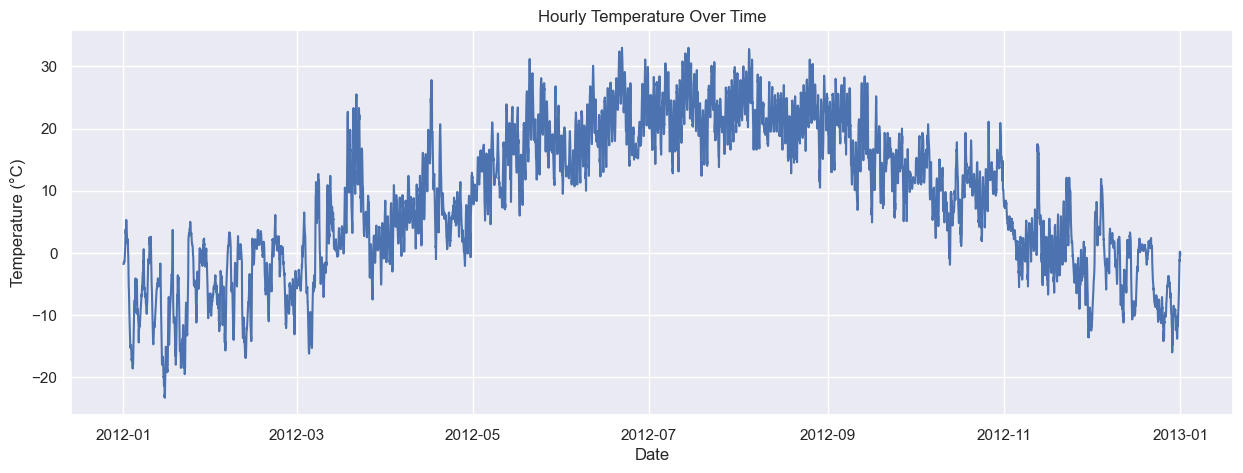

In [5]:
# Temperature Trend Over Time
plt.figure(figsize=(15,5))
sns.lineplot(x='Date/Time', y='Temp_C', data=df)
plt.title("Hourly Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()


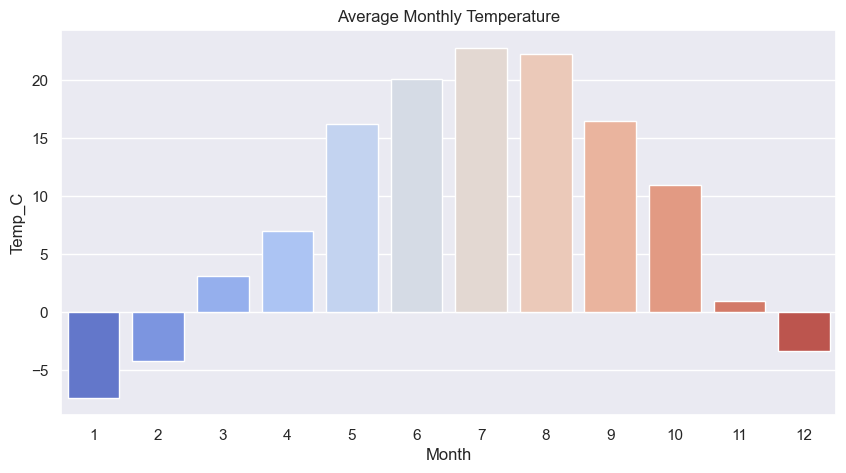

In [6]:
# Monthly Average Temperature
monthly_avg_temp = df.groupby('Month')['Temp_C'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='Month', y='Temp_C', data=monthly_avg_temp, palette='coolwarm')
plt.title("Average Monthly Temperature")
plt.show()


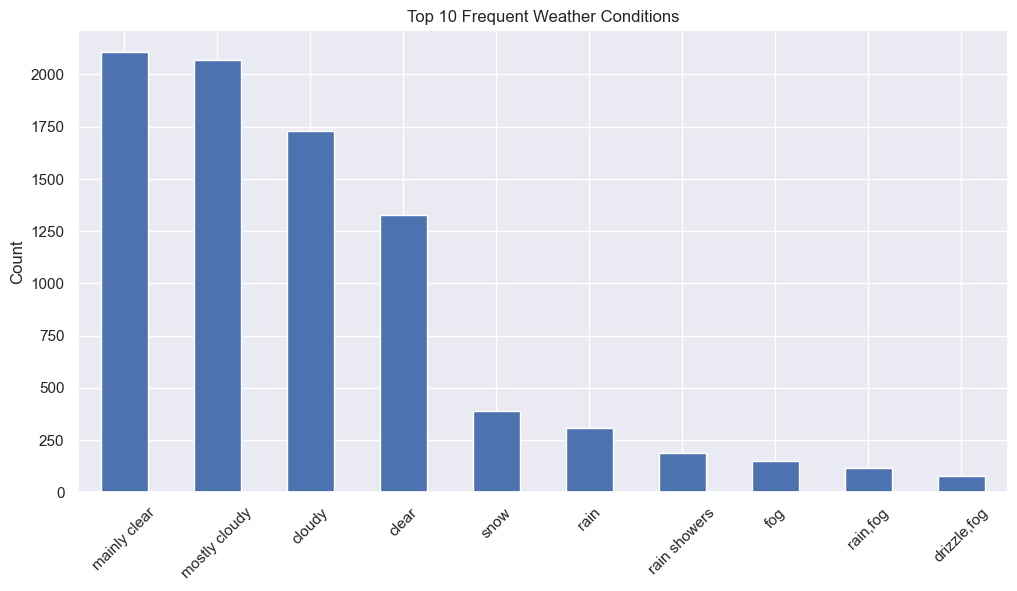

In [7]:
# Weather Condition Frequency
plt.figure(figsize=(12,6))
df['Weather'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Frequent Weather Conditions")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


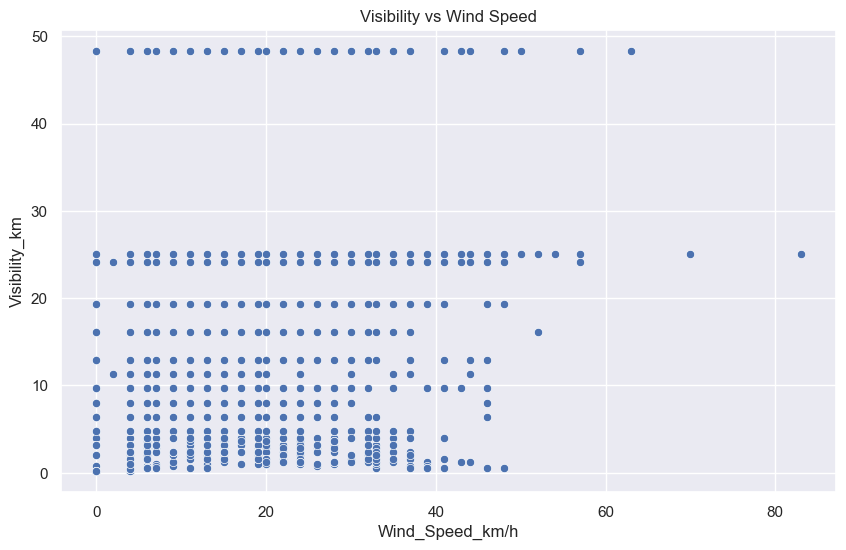

In [8]:
# Visibility vs Wind Speed
plt.figure(figsize=(10,6))
sns.scatterplot(x='Wind_Speed_km/h', y='Visibility_km', data=df)
plt.title("Visibility vs Wind Speed")
plt.show()


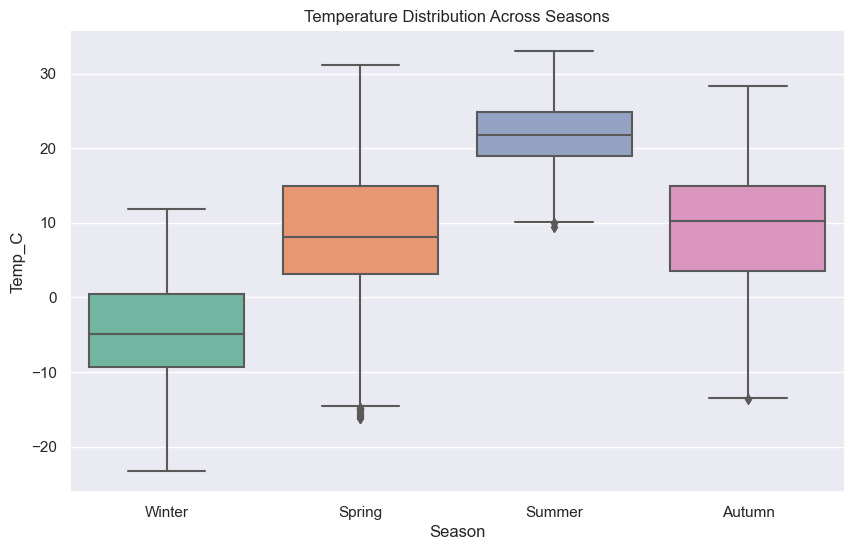

In [9]:
#Box Plot - Temperature by Season
plt.figure(figsize=(10,6))
sns.boxplot(x='Season', y='Temp_C', data=df, palette='Set2')
plt.title("Temperature Distribution Across Seasons")
plt.show()

In [10]:
# Phase 3: Time Series Analysis
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)

In [11]:
# Daily average temperature
daily_temp = df['Temp_C'].resample('D').mean()

# Monthly average temperature
monthly_temp = df['Temp_C'].resample('M').mean()


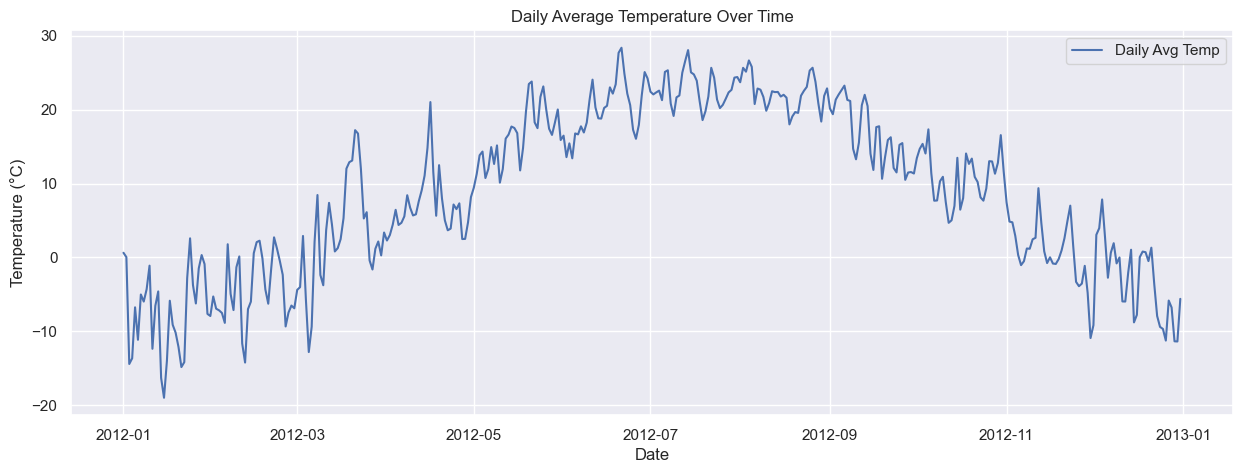

In [12]:
# Plot Trends
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(daily_temp, label='Daily Avg Temp')
plt.title("Daily Average Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


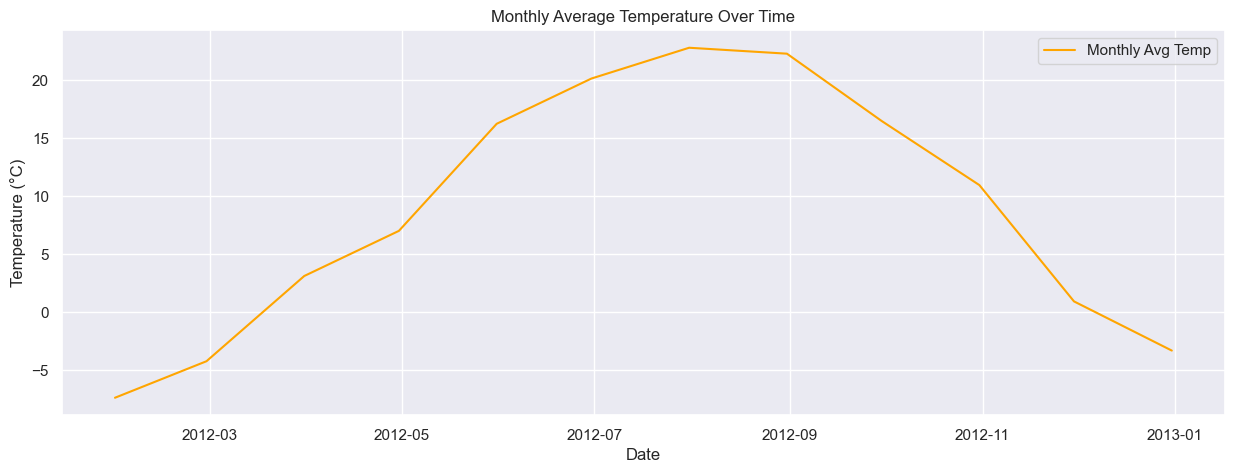

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(monthly_temp, label='Monthly Avg Temp', color='orange')
plt.title("Monthly Average Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


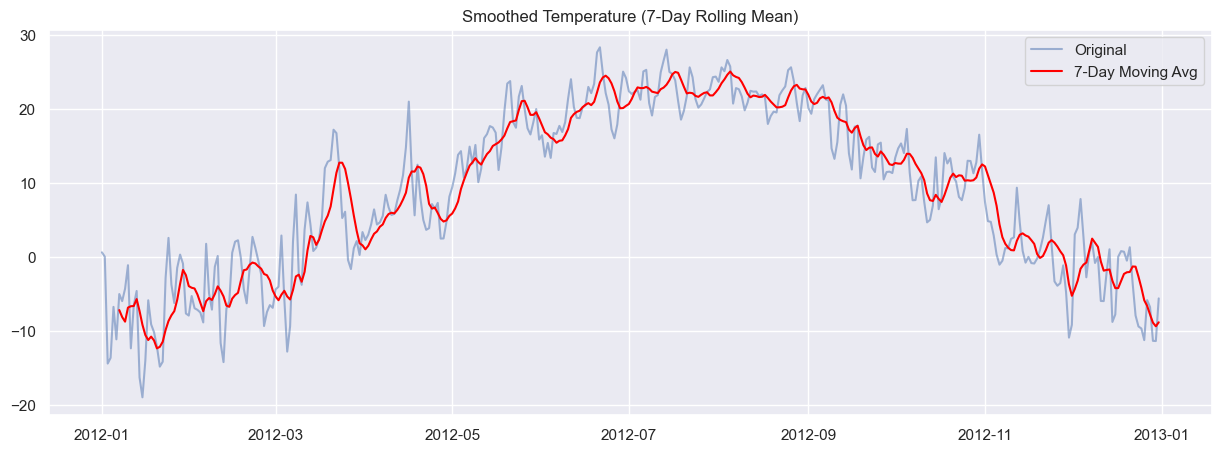

In [14]:
#Apply Moving Average (Smoothing)
daily_temp_rolling = daily_temp.rolling(window=7).mean()

plt.figure(figsize=(15, 5))
plt.plot(daily_temp, alpha=0.5, label='Original')
plt.plot(daily_temp_rolling, label='7-Day Moving Avg', color='red')
plt.title("Smoothed Temperature (7-Day Rolling Mean)")
plt.legend()
plt.show()


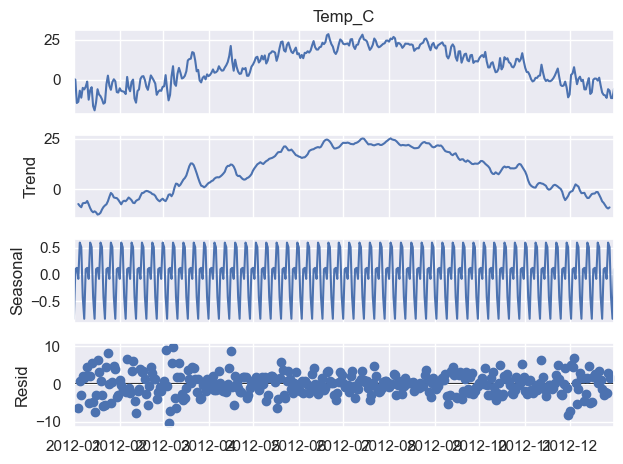

In [15]:
# Decompose Time Series (Trend, Seasonality)
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(daily_temp.dropna(), model='additive', period=7)  # weekly seasonality
decomposition.plot()
plt.show()


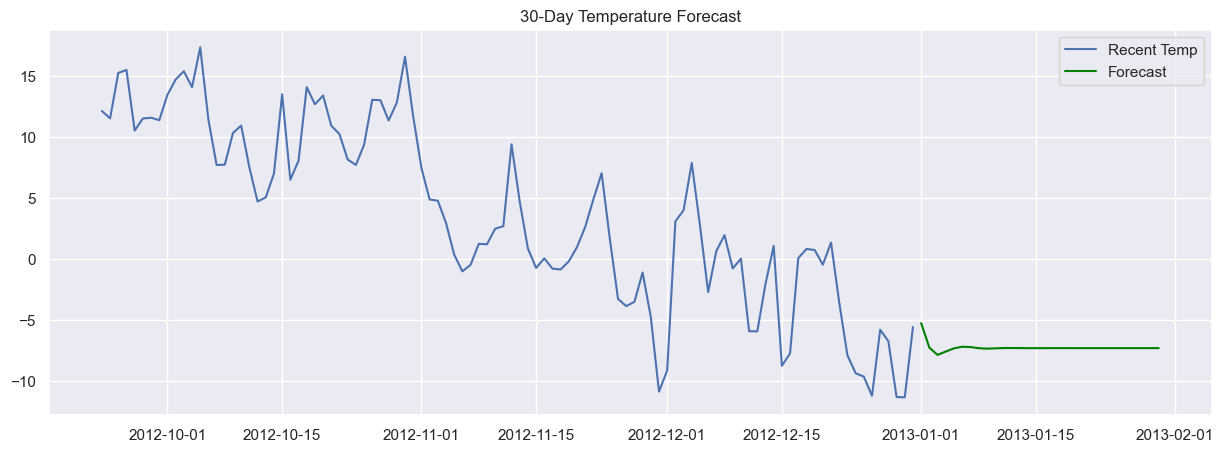

In [16]:
#Basic Forecasting with ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (you can tune p,d,q values)
model = ARIMA(daily_temp.dropna(), order=(5,1,0))  # (p,d,q)
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

# Plot
plt.figure(figsize=(15,5))
plt.plot(daily_temp[-100:], label='Recent Temp')
plt.plot(forecast, label='Forecast', color='green')
plt.title("30-Day Temperature Forecast")
plt.legend()
plt.show()


In [17]:
# Phase 4: Machine Learning (ML)
'''  We’ll use ML to:

🔮 Predict temperature (Regression)

🌧️ Predict weather condition (Classification)

📊 Understand feature importance  '''



'  We’ll use ML to:\n\n🔮 Predict temperature (Regression)\n\n🌧️ Predict weather condition (Classification)\n\n📊 Understand feature importance  '

In [18]:
# Regression Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


In [19]:
# Reset index if you set DateTime as index before
df = df.reset_index()

# Use these features
features = ['Dew_Point_Temp_C', 'Rel_Hum_pct', 'Wind_Speed_km/h', 'Visibility_km', 'Press_kPa', 'Hour', 'Month', 'Season']

# Encode categorical feature: Season
df['Season'] = df['Season'].astype(str)
df = pd.get_dummies(df, columns=['Season'], drop_first=True)


In [22]:
print(df.columns.tolist())


['Date/Time', 'Temp_C', 'Dew_Point_Temp_C', 'Rel_Hum_pct', 'Wind_Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather', 'Year', 'Month', 'Day', 'Hour', 'Weekday', 'Weather_Condition', 'Season_Spring', 'Season_Summer', 'Season_Winter']


In [24]:
df_model = df.drop(columns=['Date/Time', 'Weather', 'Weather_Condition'])
print(df_model.dtypes[df_model.dtypes == 'object'])  # Should return empty if all are numeric


Series([], dtype: object)


In [25]:
# Prepare X and y
X = df_model.drop(columns=['Temp_C'])
y = df_model['Temp_C']


In [26]:
# Train and test split, model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.63916452580687
R² Score: 0.9955866022248052


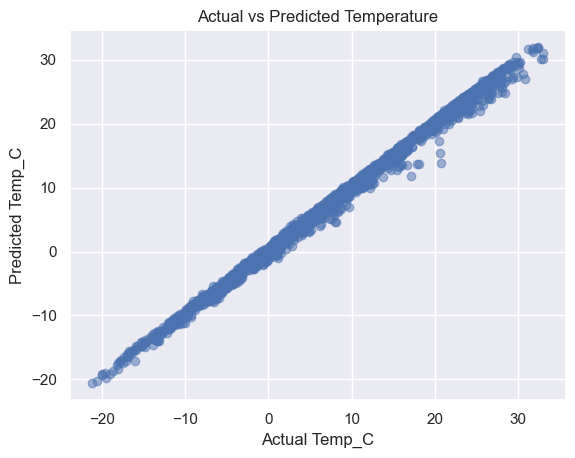

In [27]:
#Plot Actual vs Predicted
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Temp_C")
plt.ylabel("Predicted Temp_C")
plt.title("Actual vs Predicted Temperature")
plt.grid(True)
plt.show()


In [28]:
# Phase 5
pip install streamlit matplotlib seaborn


  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/13/e6/69fcbae3dd2fcb2f54283a7cbe03c8b944b79997f1b526984f91d4796a02/streamlit-1.45.1-py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/aa/f3/0b6ced594e51cc95d8c1fc1640d3623770d01e4969d29c0bd09945fafefa/altair-5.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.5.0 from https://files.pythonhosted.org/packages/10/cb/f2ad4230dc2eb1a74edf38f1a38b9b52277f75bef262d8908e60d957e13c/blinker-1.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/72/76/20fa66124dbe6be5cafeb312ece67de6b61dd91a0247d1ea13db4ebb33c2/cachetools-5.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for gitpython!=3.1.19,<4,>=3.0.7 from https://files.pythonhosted.org/packages/1d/9a/4114a9057db2f1462d5c8f8390ab7383925fe1ac012eaa4240

In [29]:
!pip install matplotlib seaborn plotly ipywidgets


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ipywidgets import interact, widgets


In [31]:
df.head()
df['Date/Time'] = pd.to_datetime(df['Date/Time'])


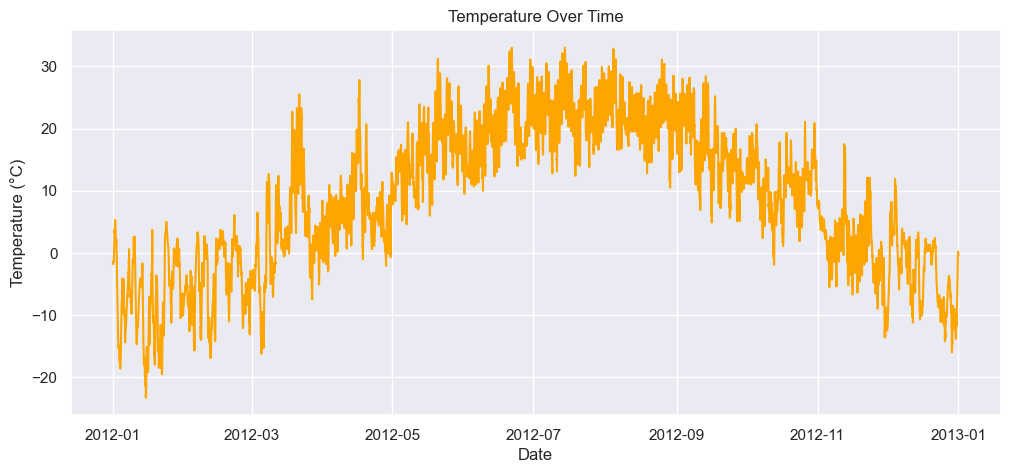

In [32]:
# Plot Basic Visualizations
'''🟠 Line Plot: Temperature Over Time'''
plt.figure(figsize=(12, 5))
plt.plot(df['Date/Time'], df['Temp_C'], color='orange')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


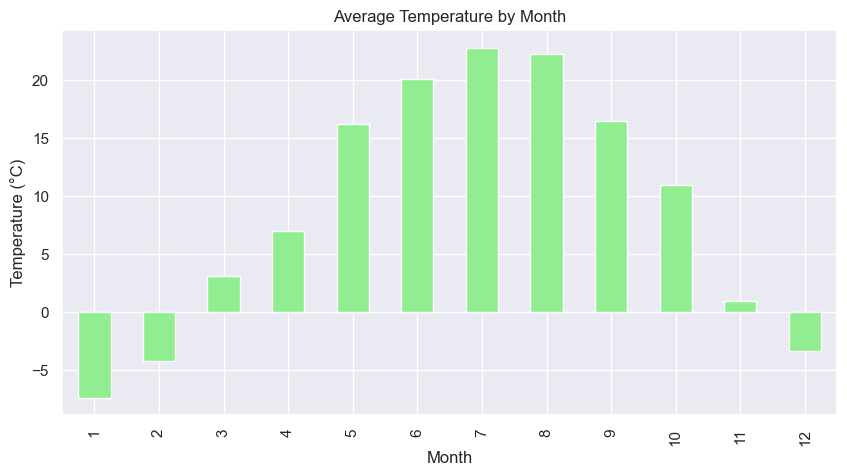

In [35]:
'''🟢 Bar Plot: Average Temperature by Month'''
monthly_avg = df.groupby('Month')['Temp_C'].mean()
monthly_avg.plot(kind='bar', figsize=(10,5), color='lightgreen')
plt.title('Average Temperature by Month')
plt.ylabel('Temperature (°C)')
plt.xlabel('Month')
plt.grid(True)
plt.show()


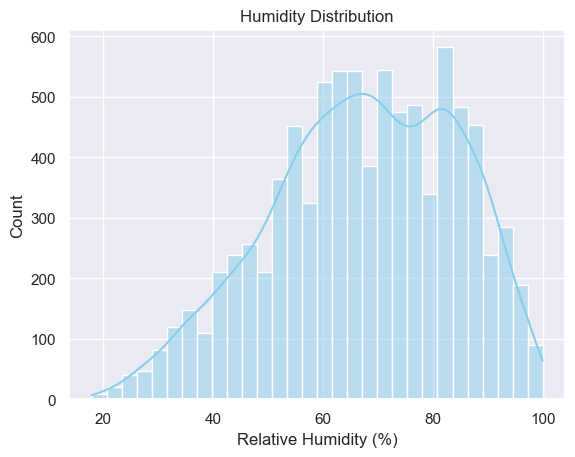

In [36]:
'''🔵 Histogram: Distribution of Humidity'''
sns.histplot(df['Rel_Hum_pct'], kde=True, bins=30, color='skyblue')
plt.title('Humidity Distribution')
plt.xlabel('Relative Humidity (%)')
plt.show()


In [37]:
'''📅 Select a Month to View Temperature'''
@interact(month=sorted(df['Month'].unique()))
def show_temp_for_month(month):
    temp_data = df[df['Month'] == month]
    plt.figure(figsize=(12,5))
    plt.plot(temp_data['Date/Time'], temp_data['Temp_C'], marker='o')
    plt.title(f'Temperature in Month {month}')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.show()


interactive(children=(Dropdown(description='month', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1),…

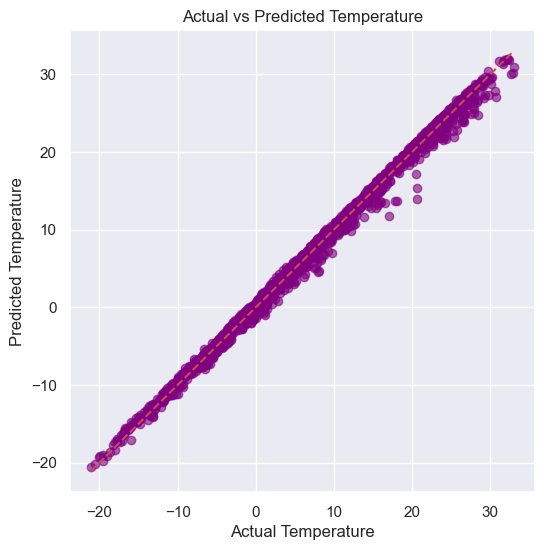

In [38]:
'''Comparing Actual vs Predicted Temperature (from your model in Phase 4)'''
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.grid(True)
plt.show()


In [39]:
'''🌟 Plotly Line Chart: for Interactive Plots'''
fig = px.line(df, x='Date/Time', y='Temp_C', title='Interactive Temperature Trend')
fig.show()


D:\New folder\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



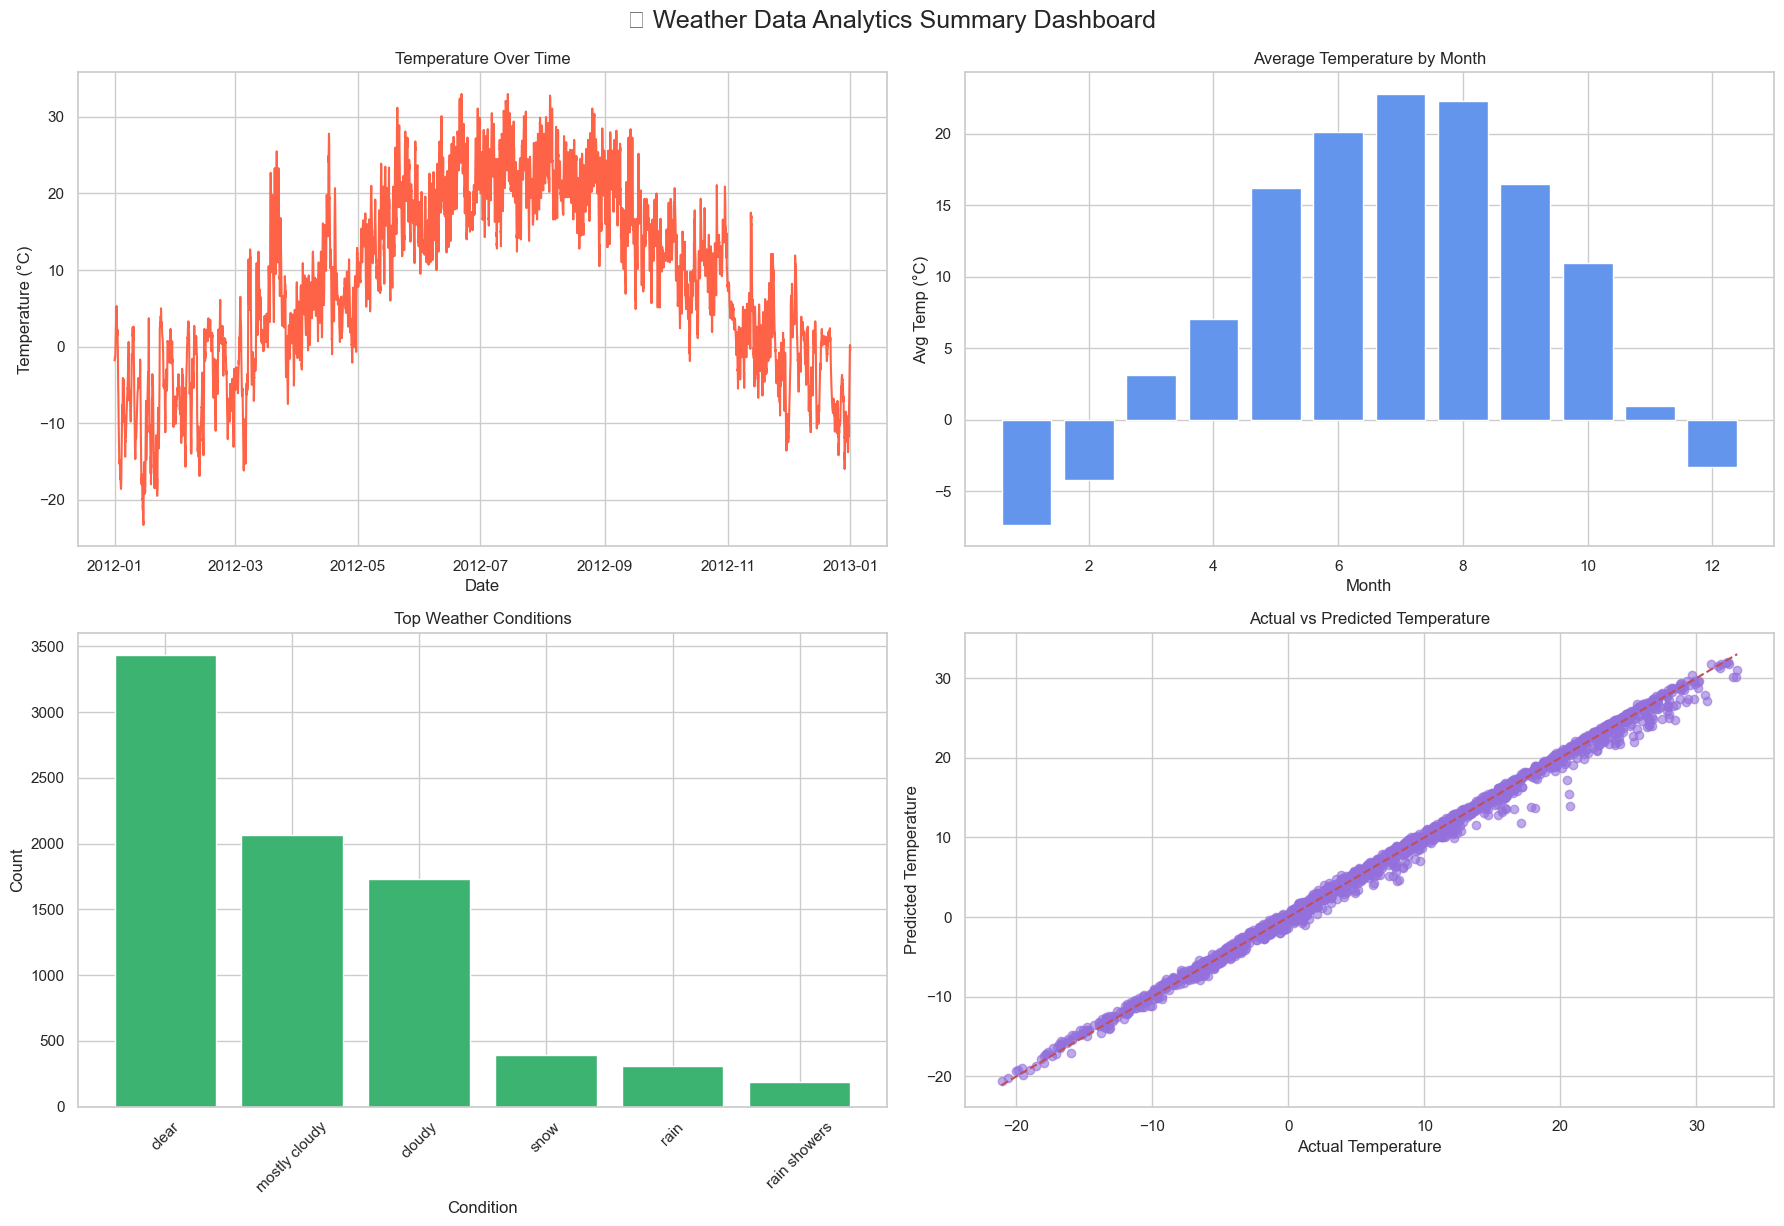

In [43]:
# ''Summary Dashboard''
'''This graph will showcase:

📈 Temperature trend over time

📊 Average temperature by month

🌦️ Weather condition distribution

🔁 Actual vs Predicted temperature'''


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set(style="whitegrid")

# Create 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
# 1. Temperature Trend Over Time
axs[0, 0].plot(df['Date/Time'], df['Temp_C'], color='tomato')
axs[0, 0].set_title('Temperature Over Time')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Temperature (°C)')

# 2. Average Temperature by Month
monthly_avg = df.groupby('Month')['Temp_C'].mean()
axs[0, 1].bar(monthly_avg.index, monthly_avg.values, color='cornflowerblue')
axs[0, 1].set_title('Average Temperature by Month')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Avg Temp (°C)')

# 3. Weather Condition Distribution
weather_counts = df['Weather_Condition'].value_counts().head(6)
axs[1, 0].bar(weather_counts.index, weather_counts.values, color='mediumseagreen')
axs[1, 0].set_title('Top Weather Conditions')
axs[1, 0].set_xlabel('Condition')
axs[1, 0].set_ylabel('Count')
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Actual vs Predicted Temperature (from Phase 4 model)
axs[1, 1].scatter(y_test, y_pred, alpha=0.6, color='mediumpurple')
axs[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axs[1, 1].set_title('Actual vs Predicted Temperature')
axs[1, 1].set_xlabel('Actual Temperature')
axs[1, 1].set_ylabel('Predicted Temperature')

plt.tight_layout()
plt.suptitle('📊 Weather Data Analytics Summary Dashboard', fontsize=18, y=1.02)
plt.show()



<Figure size 640x480 with 0 Axes>